# BX dataset

## Paths

In [1]:
# Path to BX dataset
bx_orig_dataset_path = "bx_data/original_dataset/"
bx_preprocessed_dataset_path = "bx_data/preprocessed_dataset/"

## Imports

In [2]:
import os

import numpy as np
import pandas as pd

In [3]:
# Small utility function
def get_rounded_ratio_in_percents(numerator, denominator, complement=False):

    result = (numerator / denominator) * 100
    result = 100 - result if complement else result

    return round(result, 2)

## Load data

In [4]:
books = pd.read_csv(os.path.join(bx_orig_dataset_path, "BX-Books.csv"),
                    sep=";", encoding = "ISO-8859-1", on_bad_lines='skip')
orig_books = books
ratings = pd.read_csv(os.path.join(bx_orig_dataset_path, "BX-Book-Ratings.csv"),
                      sep=";", encoding = "ISO-8859-1", on_bad_lines='skip')
orig_ratings = ratings
users = pd.read_csv(os.path.join(bx_orig_dataset_path, "BX-Users.csv"),
                    sep=";", encoding = "ISO-8859-1", on_bad_lines='skip')
orig_users = users

<ipython-input-4-f26f01545961>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(os.path.join(bx_orig_dataset_path, "BX-Books.csv"),


## Inspect books data

### Basic statistics

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [7]:
books.describe(include=[np.object])

<ipython-input-7-49083141ca37>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  books.describe(include=[np.object])


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


Count null values

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Count duplicate values (redundant as "describe()" has shown that "unique" items are same as "count")

In [9]:
books.duplicated().sum()

0

Only non image features will be inspected to evaluate their usefulness.

### ISBN

Has only unique values as expected not further inspection required.

### Book-Title

From lower count of unique titles than overall count it is evident that some of the books are just different editions of same book.

In [10]:
same_book_ratio = get_rounded_ratio_in_percents(
    len(books["Book-Title"].unique()),
    len(orig_books), complement=True)

print(f"In this case nearly {same_book_ratio}% of data \
has duplicate book title.")

In this case nearly 10.77% of data has duplicate book title.


This is also missing multiple editions of same book with slighly different titles.

In [11]:
books["Book-Title"][books["Book-Title"].str.contains("Harry Potter")]

821       The Sorcerer's Companion: A Guide to the Magic...
2143      Harry Potter and the Sorcerer's Stone (Harry P...
2809         Harry Potter and the Sorcerer's Stone (Book 1)
3459       Harry Potter and the Chamber of Secrets (Book 2)
3839      Harry Potter and the Prisoner of Azkaban (Book 3)
                                ...                        
247872                                Harry Potter Fun Book
251233                     Harry Potter y El Caliz de Fuego
256403     Harry Potter and the Bible: The Menace Behind...
257263    Harry Potter and the Goblet of Fire (Harry Pot...
259611                Harry Potter and the Sorcerer's Stone
Name: Book-Title, Length: 120, dtype: object

In [12]:
books["Book-Title"] = books["Book-Title"].apply(lambda x: x.split(" (")[0])

In [13]:
same_book_ratio = get_rounded_ratio_in_percents(
    len(books["Book-Title"].unique()),
    len(orig_books), complement=True)
print(f"Leaving only part of title before brackets \
increases duplicate ratio to {same_book_ratio}%.")

Leaving only part of title before brackets increases duplicate ratio to 16.44%.


To group up various editions under same book, each book will be given book ID.

In [14]:
unique_book_titles_df = pd.DataFrame(books["Book-Title"].unique(),
                                     columns=["Book-Title"])
unique_book_titles_df["Book-ID"] = unique_book_titles_df.index
books = books.merge(unique_book_titles_df, on="Book-Title")

In [15]:
books[books["Book-Title"].str.contains("Harry Potter")].head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
2458,0767908473,The Sorcerer's Companion: A Guide to the Magic...,ALLAN ZOLA KRONZEK,2001,Broadway,http://images.amazon.com/images/P/0767908473.0...,http://images.amazon.com/images/P/0767908473.0...,http://images.amazon.com/images/P/0767908473.0...,800
5414,059035342X,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,2062
5415,0590353403,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,2062
5416,043936213X,Harry Potter and the Sorcerer's Stone,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,2062
5417,0807281956,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1999,Listening Library,http://images.amazon.com/images/P/0807281956.0...,http://images.amazon.com/images/P/0807281956.0...,http://images.amazon.com/images/P/0807281956.0...,2062
5418,0807281751,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1999,Listening Library,http://images.amazon.com/images/P/0807281751.0...,http://images.amazon.com/images/P/0807281751.0...,http://images.amazon.com/images/P/0807281751.0...,2062
5419,043920352X,Harry Potter and the Sorcerer's Stone,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/043920352X.0...,http://images.amazon.com/images/P/043920352X.0...,http://images.amazon.com/images/P/043920352X.0...,2062
5420,0786222727,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1999,Thorndike Press,http://images.amazon.com/images/P/0786222727.0...,http://images.amazon.com/images/P/0786222727.0...,http://images.amazon.com/images/P/0786222727.0...,2062
5421,059035342x,Harry Potter and the Sorcerer's Stone,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,2062
5422,043936213x,Harry Potter and the Sorcerer's Stone,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,2062


Books with many editions are mainly for pre1950s books.

<Axes: ylabel='Book-Title'>

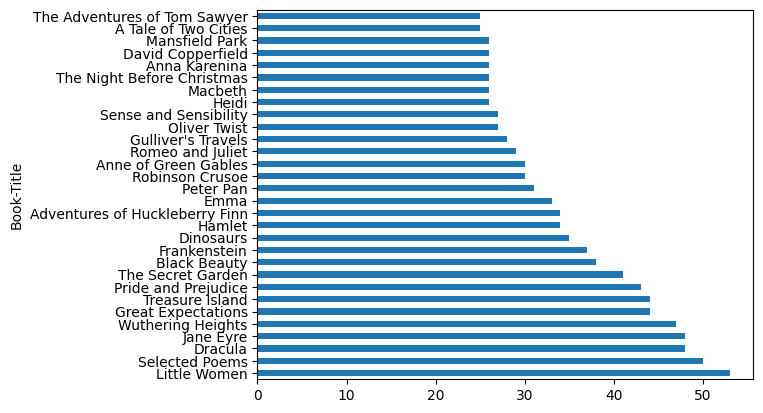

In [16]:
book_counts = books.groupby(["Book-Title"]).size().sort_values(ascending=False)
book_counts.head(30).plot.barh()

Most of the duplicate book titles are beyond box's whiskers (1.5*IQR (IQR = Q3 - Q1)) as outliers.

<Axes: >

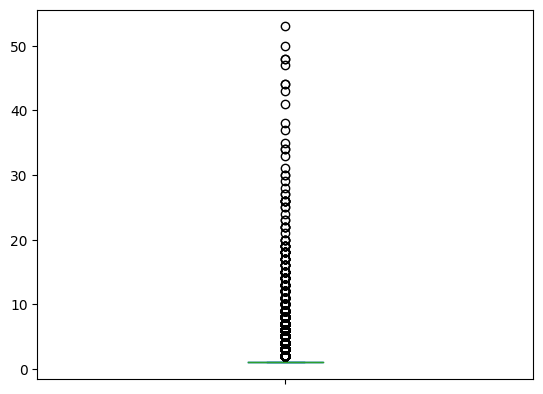

In [17]:
book_counts.plot.box()

### Book-Author

In [18]:
orig_author_count = len(books["Book-Author"].unique())
average_author_book_count = get_rounded_ratio_in_percents(
    len(books["Book-Title"].unique()),
    len(books["Book-Author"].unique())) / 100
print(f"With {orig_author_count} authors, \
average author averages {average_author_book_count} books and \
most prolific author is Agatha Christie.")

With 102024 authors, average author averages 2.2225 books and most prolific author is Agatha Christie.


After checking this book on web, it seems that it is without author. Because it is lone anomaly it will be dropped.

In [19]:
books[books["Book-Author"].apply(lambda x: isinstance(x, float))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
201675,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,158601


In [20]:
books.dropna(subset=["Book-Author"], inplace=True)
books[books["Book-Author"].apply(lambda x: isinstance(x, float))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID


This time data seems more fine. But there seems to be inconsistency in naming J.K. vs J. K.

In [21]:
books["Book-Author"][books["Book-Title"].str.contains("Harry Potter")]

2458      ALLAN ZOLA KRONZEK
5414           J. K. Rowling
5415           J. K. Rowling
5416           J. K. Rowling
5417           J. K. Rowling
                 ...        
241354         J. K. Rowling
244101     Joanne K. Rowling
252168          Warner Bros.
254927         J. K. Rowling
259203        Richard Abanes
Name: Book-Author, Length: 117, dtype: object

In [22]:
books[books["Book-Author"] == "Warner Bros."]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
155360,1569878900,Warner Bros. Quest For Camelot Pop-Up Storybook,Warner Bros.,1998,"Landoll, Inc",http://images.amazon.com/images/P/1569878900.0...,http://images.amazon.com/images/P/1569878900.0...,http://images.amazon.com/images/P/1569878900.0...,115517
252168,0439282799,Harry Potter Fun Book,Warner Bros.,2001,"Scholastic, Inc",http://images.amazon.com/images/P/0439282799.0...,http://images.amazon.com/images/P/0439282799.0...,http://images.amazon.com/images/P/0439282799.0...,207682


In [23]:
books[books["Book-Author"] == "Richard Abanes"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
88372,0830813683,"American Militias: Rebellion, Racism &amp; Rel...",Richard Abanes,1996,Intervarsity Pr,http://images.amazon.com/images/P/0830813683.0...,http://images.amazon.com/images/P/0830813683.0...,http://images.amazon.com/images/P/0830813683.0...,57538
164075,1568582196,One Nation Under Gods: A History of the Mormon...,Richard Abanes,2002,Four Walls Eight Windows,http://images.amazon.com/images/P/1568582196.0...,http://images.amazon.com/images/P/1568582196.0...,http://images.amazon.com/images/P/1568582196.0...,123441
180798,0891079815,"Cults, New Religious Movements, and Your Famil...",Richard Abanes,1998,Crossway Books,http://images.amazon.com/images/P/0891079815.0...,http://images.amazon.com/images/P/0891079815.0...,http://images.amazon.com/images/P/0891079815.0...,138915
259203,0889652015,Harry Potter and the Bible: The Menace Behind...,Richard Abanes,2001,Horizon Books Publishers,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,214653


In [24]:
books["Book-Author"] = books["Book-Author"].apply(lambda x: x.replace(". ", "."))
books["Book-Author"] = books["Book-Author"].apply(lambda x: x.replace(".", ". "))
books["Book-Author"][books["Book-Title"].str.contains("Harry Potter")]

2458      ALLAN ZOLA KRONZEK
5414           J. K. Rowling
5415           J. K. Rowling
5416           J. K. Rowling
5417           J. K. Rowling
                 ...        
241354         J. K. Rowling
244101     Joanne K. Rowling
252168         Warner Bros. 
254927         J. K. Rowling
259203        Richard Abanes
Name: Book-Author, Length: 117, dtype: object

In [25]:
diff_ratio = get_rounded_ratio_in_percents(
    len(books["Book-Author"].unique()),
    orig_author_count, complement=True)

print(f"Another {diff_ratio}% of duplicate authors \
out of {orig_author_count} were repaired.")

Another 0.38% of duplicate authors out of 102024 were repaired.


<Axes: ylabel='Book-Author'>

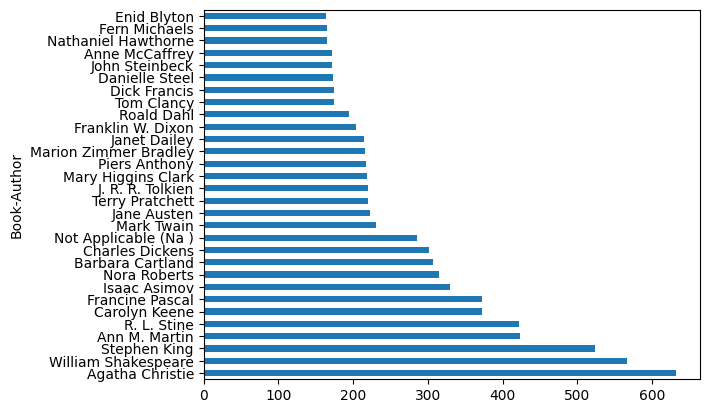

In [26]:
authors_book_counts = books.groupby(["Book-Author"]).size().sort_values(ascending=False)
authors_book_counts.head(30).plot.barh()

Most of authors have written below 4 books in data.

<Axes: >

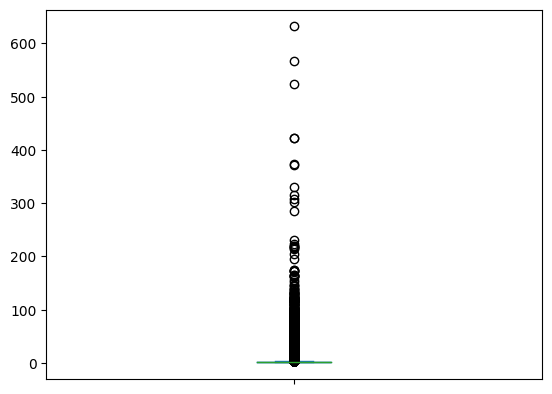

In [27]:
authors_book_counts.plot.box()

<Axes: >

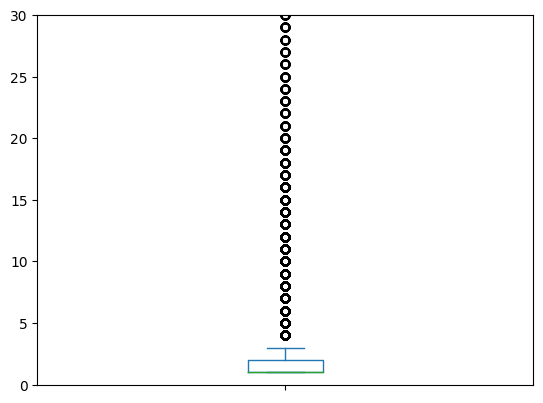

In [28]:
authors_book_counts.plot.box(ylim=(0,30))

### Publisher

In [29]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
Book-ID                0
dtype: int64

In [30]:
books[books["Publisher"].apply(lambda x: isinstance(x, float))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
21346,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,10023
149721,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,110412


In [31]:
books.loc[21346,"Publisher"] = "Bantam"
books.loc[149721,"Publisher"] = "Mundania Press LLC"

Most of the publishers have below 8 books. And Harlequin publisher dominates by a large margin.

<Axes: ylabel='Publisher'>

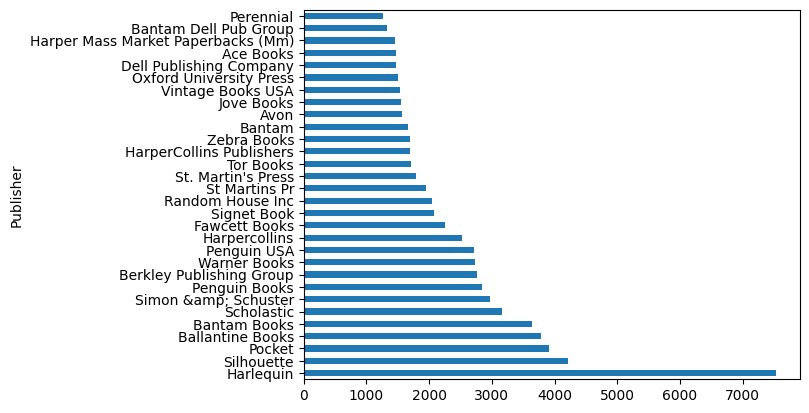

In [32]:
publisher_count_df = books.groupby("Publisher").count()["ISBN"].sort_values(ascending=False)
publisher_count_df.head(30).plot.barh()

<Axes: >

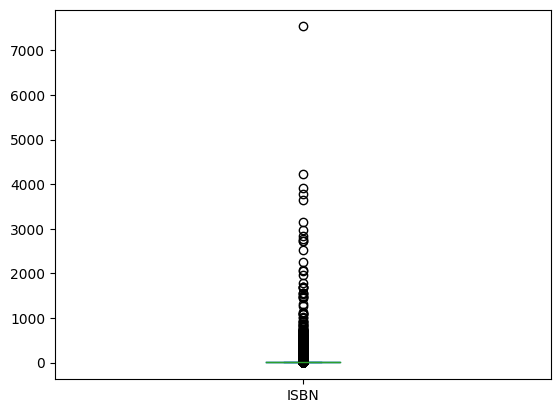

In [33]:
publisher_count_df.plot.box()

<Axes: >

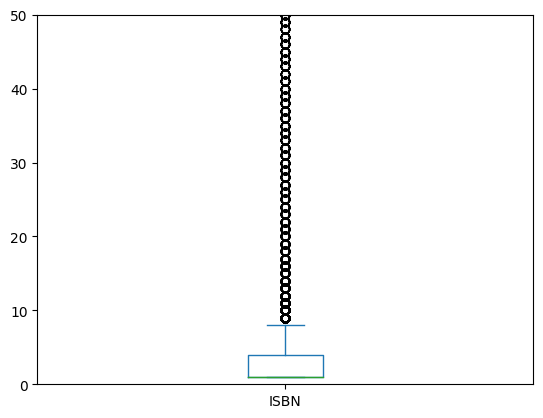

In [34]:
publisher_count_df.plot.box(ylim=(0,50))

### Year-Of-Publication

Some of the values were wrongly inserted, so they were dropped.

In [35]:
books[books["Year-Of-Publication"].apply(lambda x: not str(x).isdigit())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
220407,078946697X,"DK Readers: Creating the X-Men, How It All Began",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,176589
229744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,185676
230535,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,186447


In [36]:
books = books[books["Year-Of-Publication"].apply(lambda x: str(x).isdigit())]

<ipython-input-37-f151bdc7b6a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(int)


<Axes: >

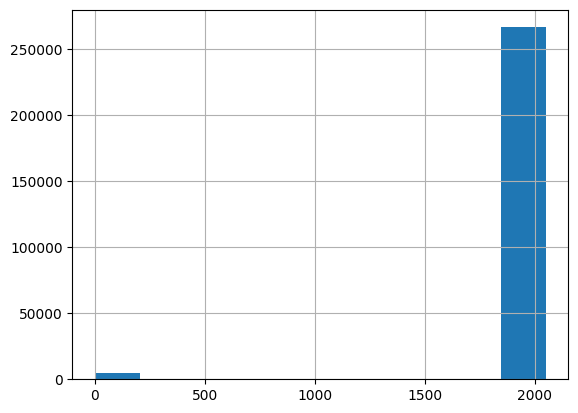

In [37]:
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(int)
books["Year-Of-Publication"].hist()

In [38]:
zero_year_books_count = len(books[books["Year-Of-Publication"] < 500])
print(f"Around {zero_year_books_count} books did not have specified year \
of publication. (They used 0 as null value.)")

Around 4618 books did not have specified year of publication. (They used 0 as null value.)


Books were mainly from 90s as this data crawl is up to 2004.

<Axes: >

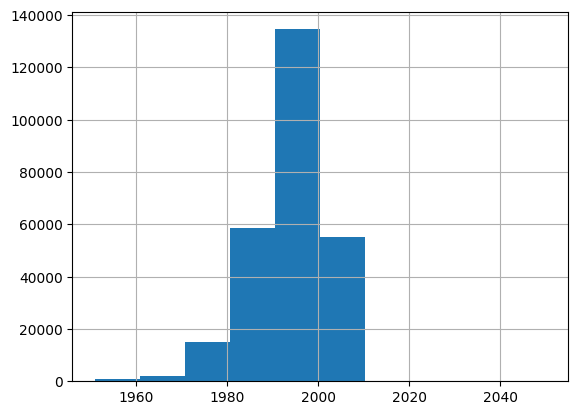

In [39]:
books["Year-Of-Publication"][books["Year-Of-Publication"] > 1950].hist()

## Inspect ratings data

### Basic statistics

User-ID and ISBN are unique identifiers and Book-Ratings are values in range 0 to 10.

In [40]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Change in data type to treat User-ID as class.

In [42]:
ratings["User-ID"] = ratings["User-ID"].astype(str)

In [43]:
ratings.describe(include=[np.object])

<ipython-input-43-e6ff3e1fe1c4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ratings.describe(include=[np.object])


,User-ID,ISBN
count,1149780,1149780
unique,105283,340556
top,11676,0971880107
freq,13602,2502


User with ID 11676 has most of the ratings 13602.

Most rated book (only single edition) is Wild Animus. With 2502 ratings.

In [44]:
books[books["ISBN"] == "0971880107"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
63,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,26


No faulty data this time.

In [45]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [46]:
ratings.duplicated().sum()

0

### User-ID

In [47]:
average_user_ratings_count = get_rounded_ratio_in_percents(
    len(ratings), len(ratings["User-ID"].unique())) / 100
print(f"Average user has {average_user_ratings_count} ratings.")

Average user has 10.9209 ratings.


<Axes: ylabel='User-ID'>

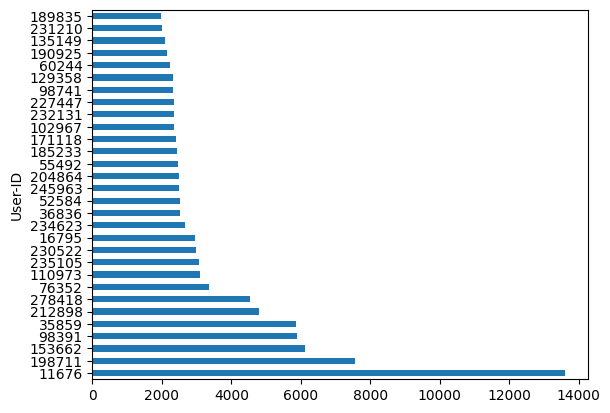

In [48]:
user_rating_counts = ratings.groupby("User-ID").count()\
["Book-Rating"].sort_values(ascending=False)
user_rating_counts.head(30).plot.barh()

<Axes: >

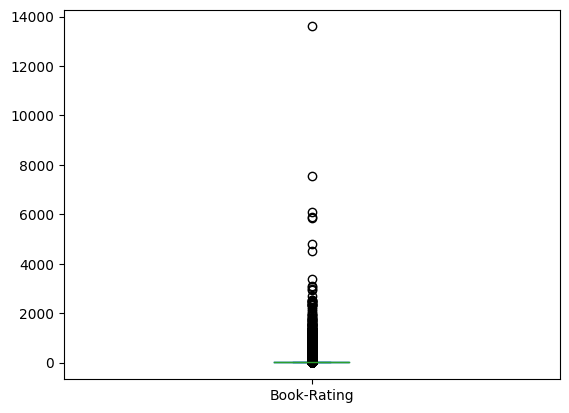

In [49]:
user_rating_counts.plot.box()

<Axes: >

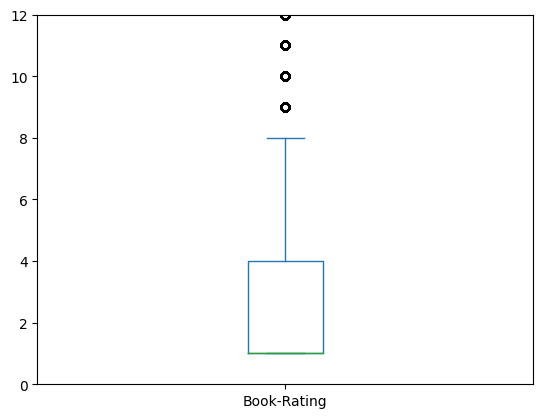

In [50]:
user_rating_counts.plot.box(ylim=(0,12))

### Book-Rating

To use ratings of various editions for same book, previously assigned Book-ID column from books dataset are reused.

In [51]:
ratings = ratings.merge(books[["ISBN", "Book-ID"]], on="ISBN")
ratings.head()

,User-ID,ISBN,Book-Rating,Book-ID
0,276725,034545104X,0,2839
1,2313,034545104X,5,2839
2,6543,034545104X,0,2839
3,8680,034545104X,5,2839
4,10314,034545104X,9,2839


Some users had given ratings to same book under different ISBN code. This would create multiple values for Item-User matrix that will be important for recommender system. That is why ratings with same user and book ID are dropped. And additionally some of the ISBN codes in ratings.csv were not in books.csv, this also drops ratings.

In [52]:
ratings = ratings[~ratings.duplicated(subset=["User-ID", "Book-ID"], keep=False)]

In [53]:
ratio_of_lost_ratings = get_rounded_ratio_in_percents(
    ratings.count().values[0],
    len(orig_ratings), complement=True)

print(f"Both of these changes together drop\
 {ratio_of_lost_ratings}% of ratings.")

Both of these changes together drop 11.59% of ratings.


In [54]:
ratings["Book-Rating"].describe()

count    1.016485e+06
mean     2.840953e+00
std      3.852815e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

<Axes: >

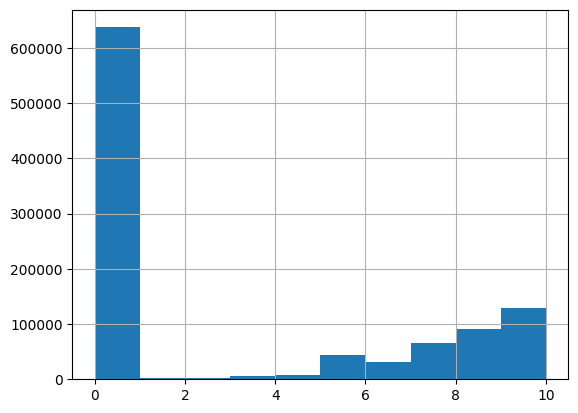

In [55]:
ratings["Book-Rating"].hist()

In [56]:
zero_ratings_count = get_rounded_ratio_in_percents(
    len(ratings[ratings["Book-Rating"] == 0]),
    len(orig_ratings))

print(f"Mean rating seem low because of heavy amount\
 ({zero_ratings_count}%) of 0 value ratings.")

Mean rating seem low because of heavy amount (55.45%) of 0 value ratings.


### ISBN -> Book-ID
Instead of ISBN, Book-ID will be analysed.

In [57]:
average_book_rating_count = get_rounded_ratio_in_percents(
    len(ratings),
    len(ratings["Book-ID"].unique())) / 100

print(f"Book has on average {average_book_rating_count} ratings.")

Book has on average 4.5058 ratings.


<Axes: ylabel='Book-Title'>

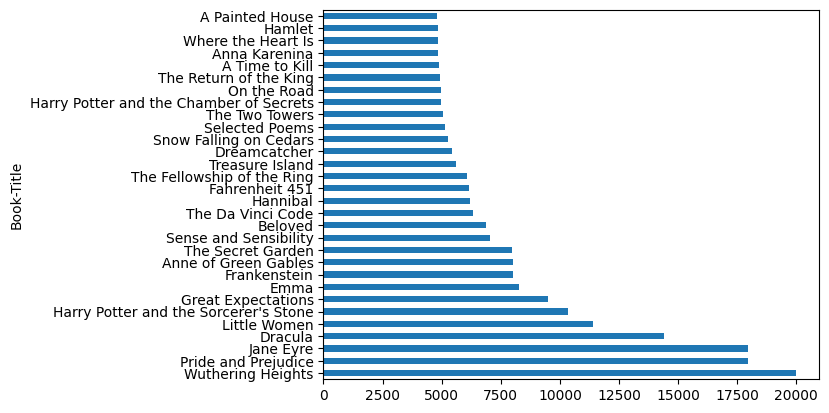

In [58]:
ratings_with_titles = ratings.merge(books, on="Book-ID")

book_rating_counts = ratings_with_titles.groupby("Book-Title").\
count()["Book-Rating"].sort_values(ascending=False)

book_rating_counts.head(30).plot.barh()

<Axes: >

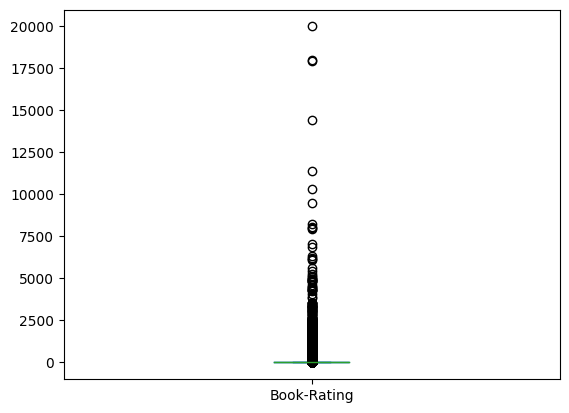

In [59]:
book_rating_counts.plot.box()

<Axes: >

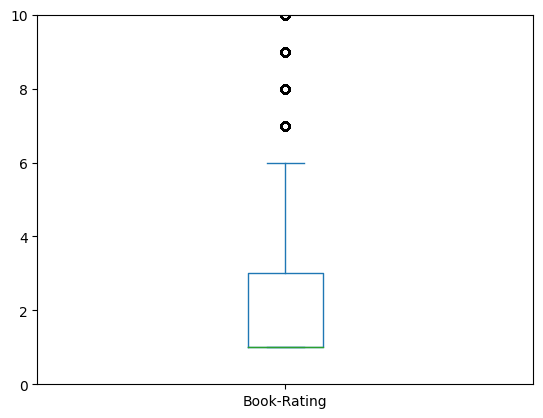

In [60]:
book_rating_counts.plot.box(ylim=(0,10))

## Inspect users data

### Basic statistics

In [61]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [62]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [63]:
users.describe(include=[np.object])

<ipython-input-63-81b4aa1c5ed8>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  users.describe(include=[np.object])


,Location
count,278858
unique,57339
top,"london, england, united kingdom"
freq,2506


In [64]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [65]:
age_null_count = get_rounded_ratio_in_percents(
    users["Age"].isnull().sum(),
    len(orig_users))

print(f"Age has {age_null_count}% of data missing.\
 Making it unrealiable feature.")

Age has 39.72% of data missing. Making it unrealiable feature.


In [66]:
users.duplicated().sum()

0

### User-ID

Most of the users have not left any book ratings.

In [67]:
rating_users_ratio = get_rounded_ratio_in_percents(
    len(ratings["User-ID"].unique()),
    len(orig_users["User-ID"].unique()))
print(f"Only {rating_users_ratio}% of all users rated a book.")

Only 33.02% of all users rated a book.


Removing non rating users has not reduced ratio of missing age features.

In [68]:
users["User-ID"] = users["User-ID"].astype(str)
users_that_rated = users[users["User-ID"].isin(ratings["User-ID"].unique())]
users_that_rated.isnull().sum() / len(users_that_rated)

User-ID     0.00000
Location    0.00000
Age         0.41497
dtype: float64

In [69]:
users = users[users["User-ID"].isin(ratings["User-ID"].unique())]
ratio_of_users_with_null_age = get_rounded_ratio_in_percents(
    users["Age"].isnull().sum(),
    len(orig_users))

print(f"Leaving only users with ratings has decreased ratio\
of users with null age value to only {ratio_of_users_with_null_age}%.")

Leaving only users with ratings has decreased ratioof users with null age value to only 13.7%.


### Location

Formating of string for location is in 3 part. I will divide it for better analysis.

In [70]:
users = users.reset_index()

In [71]:
users["Location"].describe()

count                        92091
unique                       22476
top       toronto, ontario, canada
freq                           870
Name: Location, dtype: object

In [72]:
users["Location"].head(30)

0               stockton, california, usa
1                timmins, ontario, canada
2              germantown, tennessee, usa
3              albacete, wisconsin, spain
4             fort bragg, california, usa
5                   mediapolis, iowa, usa
6            albuquerque, new mexico, usa
7               chesapeake, virginia, usa
8                               weston, ,
9            langhorne, pennsylvania, usa
10            erfurt, thueringen, germany
11        philadelphia, pennsylvania, usa
12              bellevue, washington, usa
13                  portland, oregon, usa
14               montreal, quebec, canada
15              cary, north carolina, usa
16               appleton, wisconsin, usa
17    black mountain, north carolina, usa
18                renton, washington, usa
19                tacoma, washington, usa
20                 cheyenne, wyoming, usa
21                    lyon, rhone, france
22         framingham, massachusetts, usa
23               montreal, quebec,

Some of the locations had more or less parts than 3. Data that had less are mostly incomplete. But if only last two parts are kept, all data can be standardized.

In [73]:
users["LocationAsListLength"] = users["Location"].apply(lambda x: len(x.split(", ")))
users["LocationAsListLength"].unique()

array([3, 2, 4, 5, 7])

In [74]:
two_part_locations = users["Location"]\
 [users["LocationAsListLength"][users["LocationAsListLength"] == 2].index]
two_part_locations

8                       weston, ,
38           toronto/newmarket, ,
168            davis, california,
172                    burnaby, ,
219      albuquerque, new mexico,
                   ...           
91974              kansas city, ,
92001                ann arbor, ,
92021                 murrieta, ,
92034         pasadena, maryland,
92059      overland park, kansas,
Name: Location, Length: 2857, dtype: object

In [75]:
four_part_locations = users["Location"]\
 [users["LocationAsListLength"][users["LocationAsListLength"] == 4].index]
four_part_locations

469                              washington, d.c., dc, usa
558      kidderminster, worcestershire, england, united...
935                swindon, wilts, england, united kingdom
939                       vienna, austria, bayern, austria
1267     richmond, north yorkshire, england, united kin...
                               ...                        
90482            sydenham, london, england, united kingdom
90868                  vandergrift, pa., pennsylvania, usa
91230            richmond, london, england, united kingdom
91626                              washington, dc, dc, usa
91867                     nelson, motueka, nz, new zealand
Name: Location, Length: 253, dtype: object

In [76]:
five_part_locations = users["Location"]\
 [users["LocationAsListLength"][users["LocationAsListLength"] == 5].index]
five_part_locations

3864        nanaimo, bc, v9v 1h4, british columbia, canada
27365              mizunami, inatsu, hagiwara, gifu, japan
27728                listowel, on, canada, ontario, canada
28158        valoira, a estrada, pontevedra, galiza, spain
39672             merrick, acworth, new york, georgia, usa
51480    toronto, montreal, travelling...., british col...
69985                     anytown, usa, anystate, usa, usa
74236                       lawrence, ks, usa, kansas, usa
Name: Location, dtype: object

In [77]:
two_part_loc_rat_count = len(ratings[ratings["User-ID"]\
    .isin(users["User-ID"][two_part_locations.index])])

ratio_of_two_part_locs = get_rounded_ratio_in_percents(
    two_part_loc_rat_count,
    len(orig_ratings))

print(f"By throwing them all away two part location users,\
 less than {ratio_of_two_part_locs}% of data would be lost.")

By throwing them all away two part location users, less than 2.1% of data would be lost.


In [78]:
users["ReducedLocationAsList"] = users["Location"].apply(lambda x: x.split(", ")[-2:])
users = users[~users["Location"].isin(two_part_locations)]

Finally location information can analysed meaningfully from State, Country features.

In [79]:
users["State"] = users["ReducedLocationAsList"].apply(lambda x: x[0])
users["Country"] = users["ReducedLocationAsList"].apply(lambda x: x[1])

<ipython-input-79-5d28a5b4c017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["State"] = users["ReducedLocationAsList"].apply(lambda x: x[0])
<ipython-input-79-5d28a5b4c017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["Country"] = users["ReducedLocationAsList"].apply(lambda x: x[1])


### Location: State

Largest part of experienced users is from california. Most of the states are in USA or Canada. With exemption of england (which is in UK).

In [80]:
users["State"].describe()

count          89234
unique          1861
top       california
freq            8700
Name: State, dtype: object

<Axes: ylabel='State'>

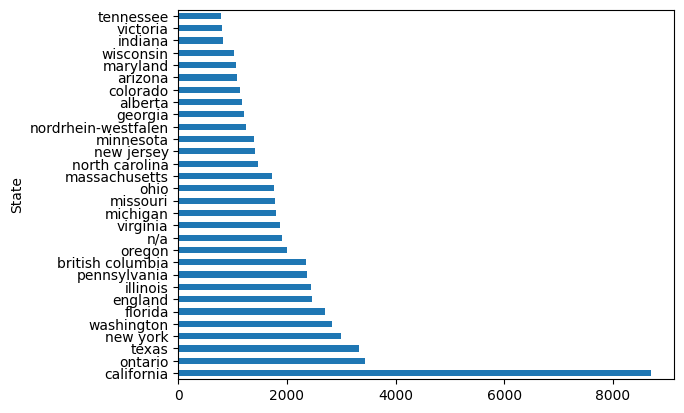

In [81]:
users_state_counts = users.groupby("State").\
    count()["User-ID"].sort_values(ascending=False)

users_state_counts.head(30).plot.barh()

While less extreme than previous box plots, by having median of 1 users per state, the State feature does not have enough data to be representational. Only interesting insights could be in analysing California against rest of USA, or making Recommendation System purely for California.

In [82]:
users_state_counts.describe()

count    1861.000000
mean       47.949490
std       320.301188
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      8700.000000
Name: User-ID, dtype: float64

<Axes: >

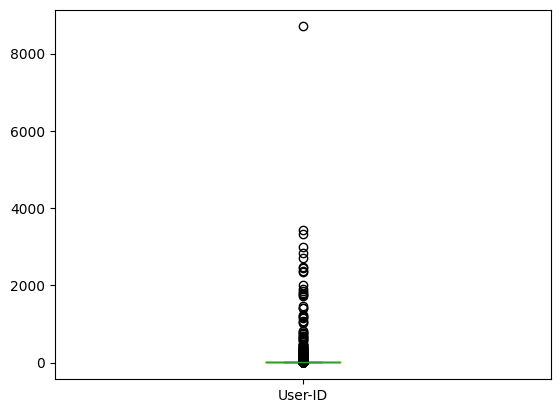

In [83]:
users_state_counts.plot.box()

### Location: Country

Unsurprisingly its just english speaking part of world. And predominantly USA. So again theoretically Book Recommendation system from only USA data could be better in USA.

In [84]:
users["Country"].describe()

count     89234
unique      288
top         usa
freq      58035
Name: Country, dtype: object

<Axes: ylabel='Country'>

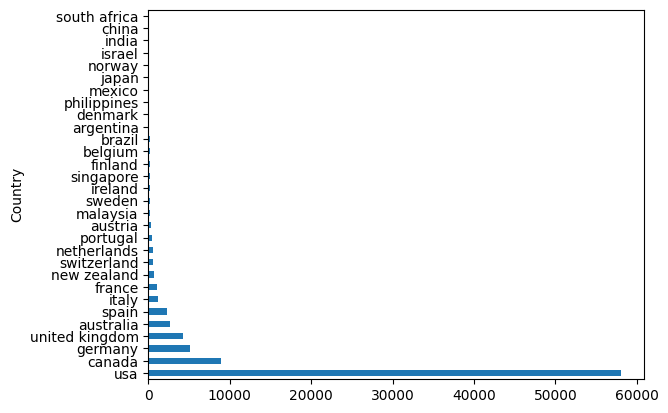

In [85]:
users_country_counts = users.groupby("Country").\
    count()["User-ID"].sort_values(ascending=False)
users_country_counts.head(30).plot.barh()

In [86]:
usa_ratio = get_rounded_ratio_in_percents(
    users_country_counts[0],
    sum(users_country_counts))

print(f"Around {usa_ratio}% of users is from USA.")

Around 65.04% of users is from USA.


### Age

Reading books may increase reader's natural lifespan, or someone is giving arbitrary data. Additionally mean is close to median which could signal that histogram will be close to normal distribution.

In [87]:
users["Age"].describe()

count    52756.000000
mean        35.790773
std         14.809414
min          0.000000
25%         25.000000
50%         33.000000
75%         45.000000
max        244.000000
Name: Age, dtype: float64

In [88]:
sum(users["Age"] > 100)

119

Age is slightly tilded towards younger side but otherwise has semblence to the normal distribution. Problem from this distribution that more uniform distribution is in case of Recommender System better. For example low rating count in pre 20 age group will result in no data for Young Adult novels that make up significant part of the bestseller books (such as Harry Potter, Hunger Games, etc.)

<Axes: >

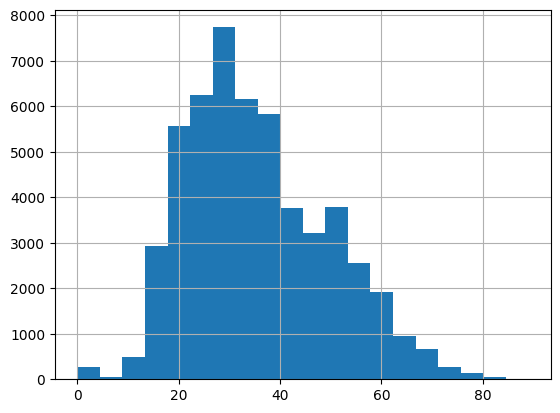

In [89]:
users["Age"][users["Age"] < 90].hist(bins=20)

While upon closer inspection without zero value ratings could be some insight be speculated, in my opinion shape of distribution does not change between age brackets. Aging does not drastically change rating value distribution. Only thing that can said for sure is about user reading strategy. All users (even before filtering) either gave higher scores (with most of the values on higher spectrum) or stop reading book and gave zero (as 1 to 4 values are underused).

Lastly age bracket genre did not drastically changed, with exemption being pre 20 group. That had a lot of school prescribed literature and absence of 18+ themes.

In [90]:
pre20_users = users[users["Age"] < 20]
post20_pre30_users = users[(users["Age"] >= 20) & (users["Age"] < 30)]
post30_pre40_users = users[(users["Age"] >= 30) & (users["Age"] < 40)]
post40_pre50_users = users[(users["Age"] >= 40) & (users["Age"] < 50)]
post50_users = users[(users["Age"] >= 50)]

In [91]:
ratings_with_titles = ratings.merge(books, on="Book-ID")

<Axes: >

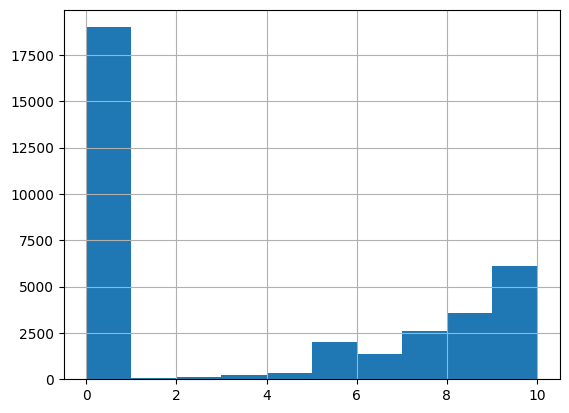

In [92]:
ratings[ratings["User-ID"].isin(pre20_users["User-ID"])]["Book-Rating"].hist()

<Axes: ylabel='Book-Title'>

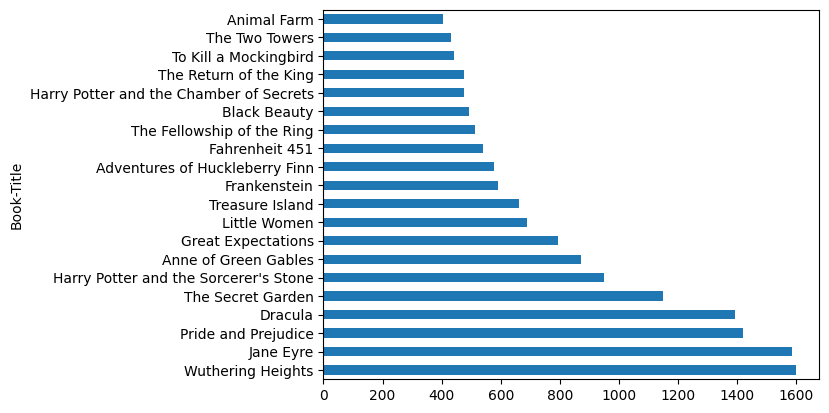

In [93]:
pre20_title_counts = ratings_with_titles[
    ratings_with_titles["User-ID"].\
    isin(pre20_users["User-ID"])].groupby("Book-Title").count()

pre20_title_counts["Book-Rating"].\
    sort_values(ascending=False).head(20).plot.barh()

<Axes: >

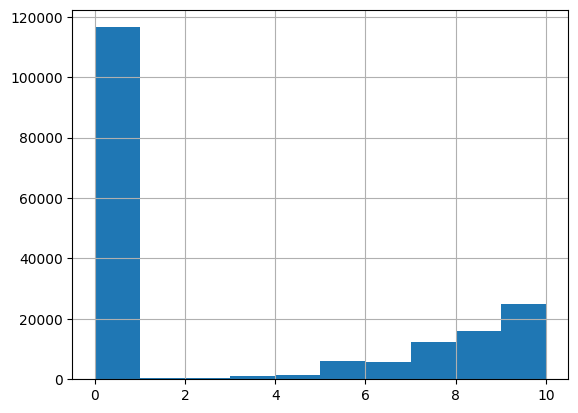

In [94]:
ratings[ratings["User-ID"].\
        isin(post20_pre30_users["User-ID"])]["Book-Rating"].hist()

<Axes: ylabel='Book-Title'>

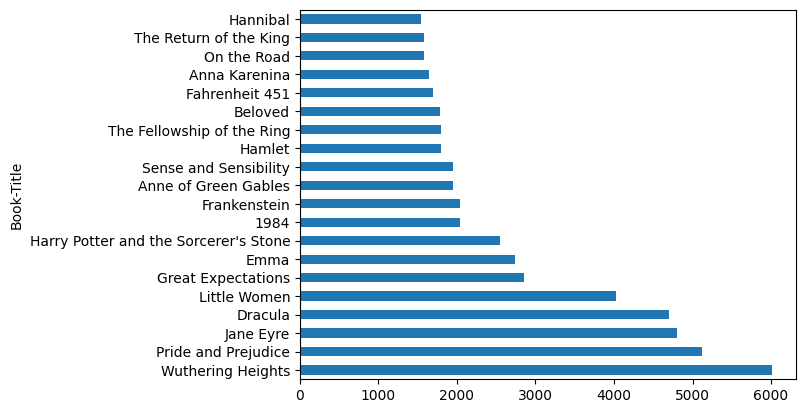

In [95]:
post20_pre30_title_counts = ratings_with_titles[
    ratings_with_titles["User-ID"].\
    isin(post20_pre30_users["User-ID"])].groupby("Book-Title").count()

post20_pre30_title_counts["Book-Rating"].\
    sort_values(ascending=False).head(20).plot.barh()

<Axes: >

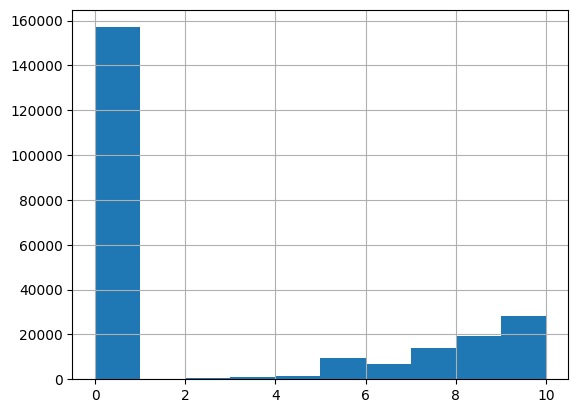

In [96]:
ratings[ratings["User-ID"].\
        isin(post30_pre40_users["User-ID"])]["Book-Rating"].hist()

<Axes: ylabel='Book-Title'>

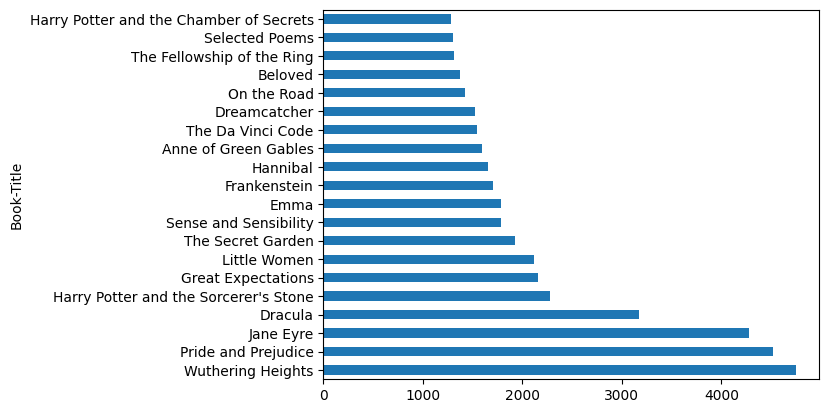

In [97]:
post30_pre40_title_counts = ratings_with_titles[
    ratings_with_titles["User-ID"].\
    isin(post30_pre40_users["User-ID"])].groupby("Book-Title").count()

post30_pre40_title_counts["Book-Rating"].\
    sort_values(ascending=False).head(20).plot.barh()

<Axes: >

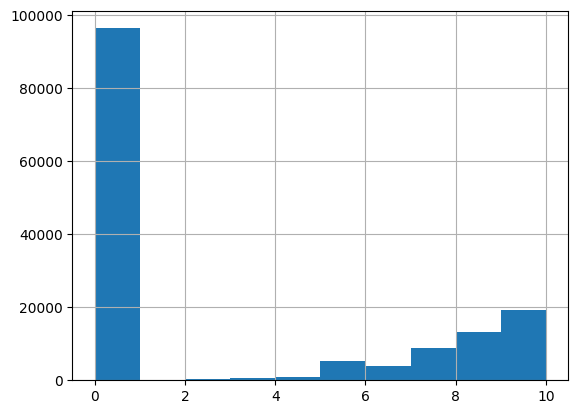

In [98]:
ratings[ratings["User-ID"].\
        isin(post40_pre50_users["User-ID"])]["Book-Rating"].hist()

<Axes: ylabel='Book-Title'>

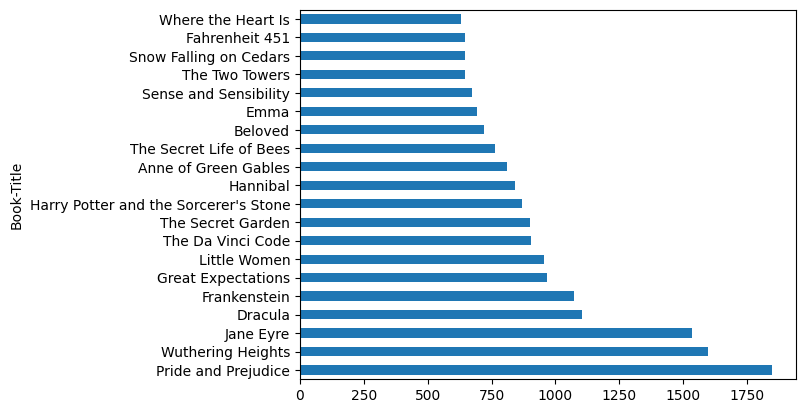

In [99]:
post40_pre50_title_counts = ratings_with_titles[
    ratings_with_titles["User-ID"].\
    isin(post40_pre50_users["User-ID"])].groupby("Book-Title").count()

post40_pre50_title_counts["Book-Rating"].\
    sort_values(ascending=False).head(20).plot.barh()

<Axes: >

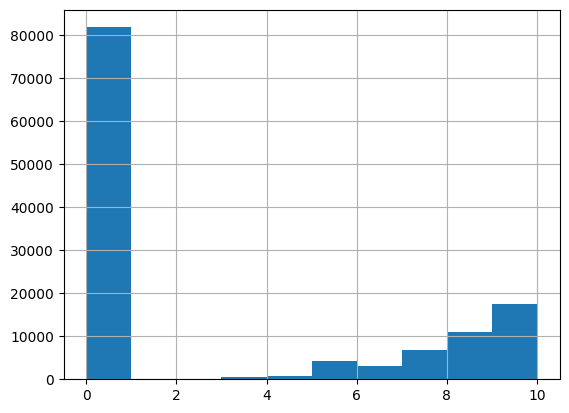

In [100]:
ratings[ratings["User-ID"].\
        isin(post50_users["User-ID"])]["Book-Rating"].hist()

<Axes: ylabel='Book-Title'>

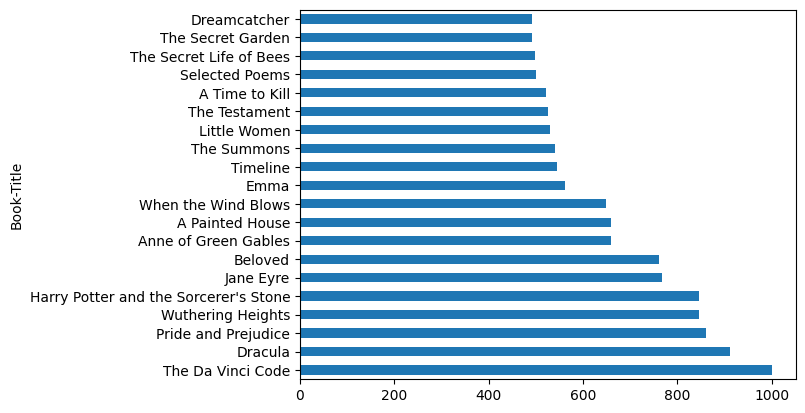

In [101]:
post50_title_counts = ratings_with_titles[
    ratings_with_titles["User-ID"].\
    isin(post50_users["User-ID"])].groupby("Book-Title").count()

post50_title_counts["Book-Rating"].\
    sort_values(ascending=False).head(20).plot.barh()

## Distilling data

### Filtering ratings by users

Lets inspect if there are users that always give ratings of 0.

In [102]:
user_ratings_sums = ratings.groupby("User-ID").sum()

<ipython-input-102-b083de8954b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_ratings_sums = ratings.groupby("User-ID").sum()


In [103]:
non_zero_user_sums = user_ratings_sums[user_ratings_sums > 0].dropna()

In [104]:
non_rating_user_ratio = get_rounded_ratio_in_percents(
    len(non_zero_user_sums),
    len(user_ratings_sums), complement=True)

print(f"{non_rating_user_ratio}% of users had only zero \
ratings and were dropped")

26.08% of users had only zero ratings and were dropped


In [105]:
non_zero_ratings = ratings[ratings["User-ID"].isin(non_zero_user_sums.index)]

In [106]:
non_zero_ratings["Book-Rating"].describe()

count    972849.000000
mean          2.968380
std           3.889954
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: Book-Rating, dtype: float64

<Axes: >

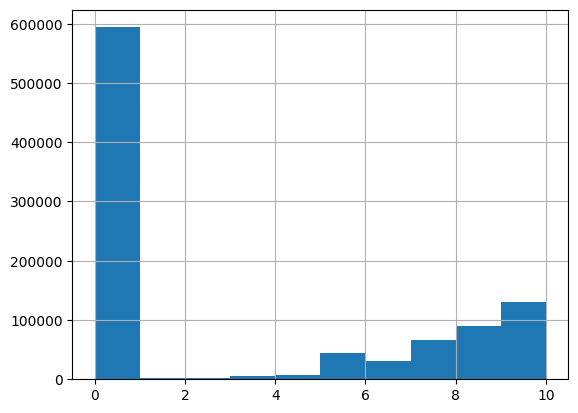

In [107]:
non_zero_ratings["Book-Rating"].hist()

In [108]:
removed_books_ratio = get_rounded_ratio_in_percents(
    len(non_zero_ratings["Book-ID"].unique()),
    len(ratings["Book-ID"].unique()), complement=True)

print(f"By removing zero only ratings, only {removed_books_ratio}%\
 of books lost their only ratings. So book diversity was not lost.")

By removing zero only ratings, only 1.75% of books lost their only ratings. So book diversity was not lost.


Non zero ratings were further filtered to leave only experienced users.

In [109]:
exp_user_threshold_number_of_ratings = 200

non_zero_user_ratings_counts = non_zero_ratings.groupby("User-ID").\
    count()["Book-Rating"].sort_values(ascending=False)
non_zero_experienced_users = non_zero_user_ratings_counts[
    non_zero_user_ratings_counts > exp_user_threshold_number_of_ratings]
experienced_nonzero_ratings = ratings[ratings["User-ID"].\
                                      isin(non_zero_experienced_users.index)]

In [110]:
experienced_users_uniq_book_ratio = get_rounded_ratio_in_percents(
    len(experienced_nonzero_ratings["Book-ID"].unique()),
    len(ratings["Book-ID"].unique()))

experienced_users_ratio = get_rounded_ratio_in_percents(
    len(experienced_nonzero_ratings["User-ID"].unique()),
    len(ratings["User-ID"].unique()))

ratings = experienced_nonzero_ratings

print(f"Positive offset comes in form of reduced computation\
 from number of users reduced to {experienced_users_ratio}% of original amount.\
 With {experienced_users_uniq_book_ratio}% of books still having rating.")

Positive offset comes in form of reduced computation from number of users reduced to 0.86% of original amount. With 64.24% of books still having rating.


### Filtering ratings by books

Ratings will additionally be filtered by having number of ratings per book threshold.

In [111]:
book_id_ratings_counts = ratings.groupby("Book-ID").count()\
["Book-Rating"].sort_values(ascending=False)
book_id_ratings_counts.describe()

count    144927.000000
mean          3.150338
std           7.362272
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         327.000000
Name: Book-Rating, dtype: float64

<Axes: ylabel='Frequency'>

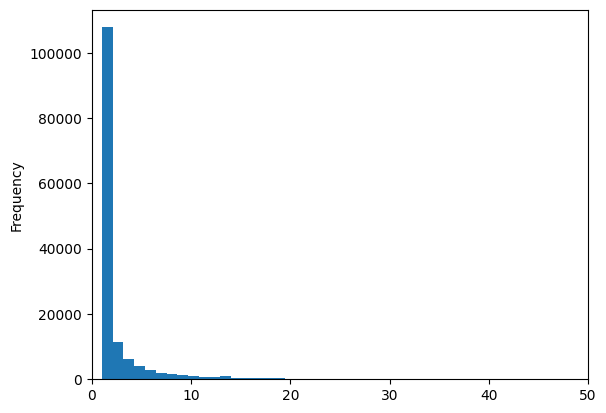

In [112]:
book_id_ratings_counts.plot.hist(bins=300, xlim=(0,50))

<Axes: >

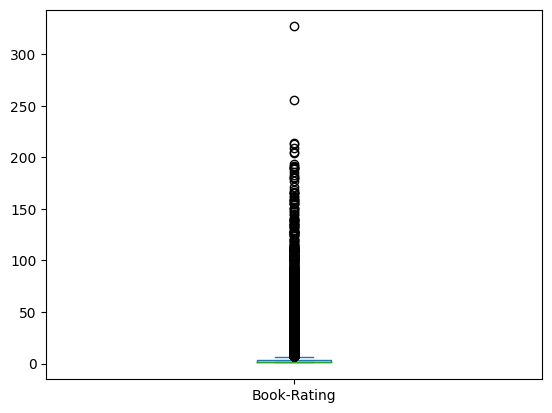

In [113]:
book_id_ratings_counts.plot.box()

In [114]:
book_threshold_rating_count = 50
ratio_of_original_books_in_filtered_ratings = get_rounded_ratio_in_percents(
    sum(book_id_ratings_counts > book_threshold_rating_count),
    len(book_id_ratings_counts))

print(f"Most of the rated books (after filtering users) have low number,\n\
but there few outliers at other end of spectrum. Lets have\
 {book_threshold_rating_count}\n\
ratings for book as a threshold to consider book properly rated.\n\
This will leave after all filterings only\
 {ratio_of_original_books_in_filtered_ratings}% of original books.")

Most of the rated books (after filtering users) have low number,
but there few outliers at other end of spectrum. Lets have 50
ratings for book as a threshold to consider book properly rated.
This will leave after all filterings only 0.45% of original books.


In [115]:
book_id_counts_with_more_ratings = book_id_ratings_counts[
    book_id_ratings_counts > book_threshold_rating_count]
ratings = ratings[ratings["Book-ID"].\
                  isin(book_id_counts_with_more_ratings.index)]
ratings

,User-ID,ISBN,Book-Rating,Book-ID
65,3363,0446520802,0,2490
74,23768,0446520802,6,2490
77,27617,0446520802,9,2490
78,28204,0446520802,0,2490
79,29855,0446520802,0,2490
...,...,...,...,...
1027918,269566,0670809381,0,649
1028488,270713,0786205318,7,9063
1029065,271705,B0001PIOX4,0,178
1029756,274004,0613364082,0,4201


In [116]:
print(f"Filtering process overview: \n\
A) Filter ratings from users with less than\
 {exp_user_threshold_number_of_ratings} ratings users.\n\
B) Filter ratings for books with less than\
 {book_threshold_rating_count} ratings.")

Filtering process overview: 
A) Filter ratings from users with less than 200 ratings users.
B) Filter ratings for books with less than 50 ratings.


### Filtering books to first edition

But since to consider year of publication to be relevant feature, for book with multiple editions should be relevant only year of first publication, as this determines true age of the book. But many books have invalid zero value for year, and for some of the books this is their only year value.

So first year of publication for books with year value of 0 is replaced with nearest higher year value of book with same name. Single edition books with year value of 0 are kept unchanged.  

Then remove all multi-year books except one with lowest year. This will keep only one edition per book.

In [117]:
def replace_zero(series):
    if series.min() == 0:
        nonzero_values = series[series != 0]
        if len(nonzero_values) > 0:
            return series.replace(0, nonzero_values.min())
    return series

books["Year-Of-Publication"] = books.groupby("Book-Title")\
 ["Year-Of-Publication"].transform(replace_zero)

<Axes: >

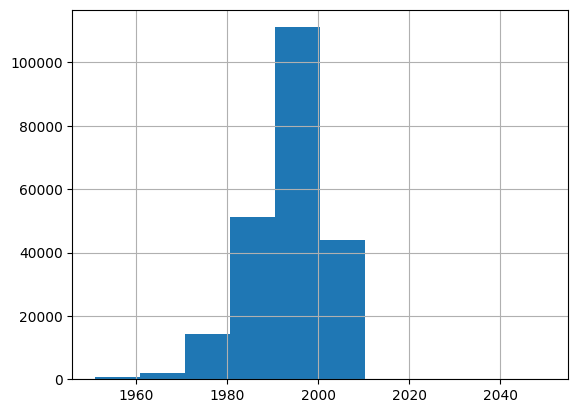

In [118]:
min_idx = books.groupby("Book-Title")["Year-Of-Publication"].idxmin()
books = books.loc[min_idx]
books["Year-Of-Publication"][books["Year-Of-Publication"] > 1950].hist()

There are many overlapping book titles but such as: Harry Potter y El Caliz de Fuego and Harry Potter y el cÃ¡liz de fuego. But solution to this would be using tokenizer to transform titles to embeddings and remove near identical title embeddings. This is would take too much time so it is left as a possible improvement.

In [119]:
books[books["Book-Title"].str.contains("Harry Potter")].head(60)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-ID
259203,0889652015,Harry Potter and the Bible: The Menace Behind...,Richard Abanes,2001,Horizon Books Publishers,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,214653
134022,0854769412,A Closer Look at Harry Potter: Bending and Sha...,John Houghton,2001,Kingsway Communications,http://images.amazon.com/images/P/0854769412.0...,http://images.amazon.com/images/P/0854769412.0...,http://images.amazon.com/images/P/0854769412.0...,96386
74312,0933833571,Beacham's Sourcebook For Teaching Young Adult ...,Elizabeth D. Schafer,2000,Beacham Publishing Corporation,http://images.amazon.com/images/P/0933833571.0...,http://images.amazon.com/images/P/0933833571.0...,http://images.amazon.com/images/P/0933833571.0...,46491
211593,074754204X,Harry Potter &amp; Philosophers Stone,Rowling J K,1998,Bloomsbury Publishing Plc,http://images.amazon.com/images/P/074754204X.0...,http://images.amazon.com/images/P/074754204X.0...,http://images.amazon.com/images/P/074754204X.0...,168096
189159,1581306571,Harry Potter &amp; the Prisoner of Azkaban: Gr...,J. K. Rowling,2000,Novel Units,http://images.amazon.com/images/P/1581306571.0...,http://images.amazon.com/images/P/1581306571.0...,http://images.amazon.com/images/P/1581306571.0...,146730
62376,1585980730,Harry Potter Collector's Value Guide,CheckerBee Publishing,2000,CheckerBee Publishing,http://images.amazon.com/images/P/1585980730.0...,http://images.amazon.com/images/P/1585980730.0...,http://images.amazon.com/images/P/1585980730.0...,37237
73648,888451049X,Harry Potter E il Calice Di Fuoco / Harry Pott...,J. K. Rowling,2002,Distribooks,http://images.amazon.com/images/P/888451049X.0...,http://images.amazon.com/images/P/888451049X.0...,http://images.amazon.com/images/P/888451049X.0...,46001
60063,8877828528,Harry Potter E il Prigioniero D'Azkaban,J. K. Rowling,2002,Distribooks,http://images.amazon.com/images/P/8877828528.0...,http://images.amazon.com/images/P/8877828528.0...,http://images.amazon.com/images/P/8877828528.0...,35568
54211,8877827033,Harry Potter E la Camera Dei Segreti,J. K. Rowling,2002,Distribooks,http://images.amazon.com/images/P/8877827033.0...,http://images.amazon.com/images/P/8877827033.0...,http://images.amazon.com/images/P/8877827033.0...,31264
73676,8877827025,Harry Potter E la Pietra Filosfale,J. K. Rowling,2002,Distribooks,http://images.amazon.com/images/P/8877827025.0...,http://images.amazon.com/images/P/8877827025.0...,http://images.amazon.com/images/P/8877827025.0...,46020


In [120]:
same_book_ratio = get_rounded_ratio_in_percents(
    len(books["Book-Title"].unique()),
    len(books), complement=True)
filtered_book_ratio = get_rounded_ratio_in_percents(
    len(books),
    len(orig_books), complement=True)

print(f"After keeping only single edition for book with same book title, \
the duplicate book title data ratio is {same_book_ratio}% \
and {filtered_book_ratio}% of books were filtered out by this process.")

After keeping only single edition for book with same book title, the duplicate book title data ratio is 0.0% and 16.44% of books were filtered out by this process.


### Adding IDs for vector embeddings in methods

In [121]:
# Extract all unique user IDs strings and give them embedding ID
unique_users_ids = pd.DataFrame(ratings["User-ID"].unique(), columns=["User-ID"])
unique_users_ids["User-Embedding-ID"] = unique_users_ids.index

# Extract all unique book IDs strings and give them embedding ID
unique_books_ids = pd.DataFrame(ratings["Book-ID"].unique(), columns=["Book-ID"])
unique_books_ids["Book-Embedding-ID"] = unique_books_ids.index

# Assign to each rating, its embedding book ID, user ID
ratings = ratings.merge(unique_books_ids, on="Book-ID")
ratings = ratings.merge(unique_users_ids, on="User-ID")

# Extract all unique authors strings and give them ID
books_authors = books["Book-Author"].drop_duplicates().reset_index()
books_authors["Author-Embedding-ID"] = list(books_authors.index)

# Extract all unique int years and give them ID
books_years = books["Year-Of-Publication"].drop_duplicates().reset_index()
books_years["Year-Embedding-ID"] = list(books_years.index)

# Assign to each book, its embedding book ID, author ID and year ID
books = books.merge(unique_books_ids, on="Book-ID")
books = books.merge(books_authors[
    ["Author-Embedding-ID", "Book-Author"]], on="Book-Author")
books = books.merge(books_years[
    ["Year-Embedding-ID", "Year-Of-Publication"]], on="Year-Of-Publication")

## Data inspection conclusion

All features in books.csv data can be considered usefull as an input for deep learning model that could be used as a ranking model. Only exemption being Image-URLs there will be needed only one for recommendation page. Also book that cannot be recommended (not in ratings) will be filtered out.

In [122]:
books = books[["Book-Embedding-ID","Author-Embedding-ID","Year-Embedding-ID",
               "Book-ID", "ISBN", "Book-Title", "Book-Author",
               "Year-Of-Publication", "Publisher", "Image-URL-L"]]
books = books[books["Book-ID"].isin(ratings["Book-ID"])]
books

,Book-Embedding-ID,Author-Embedding-ID,Year-Embedding-ID,Book-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,331,642,26,2023,0451519841,1984,George Orwell,1980,New Amer Library,http://images.amazon.com/images/P/0451519841.0...
1,286,1698,26,206,0394513924,Congo,Michael Crichton,1980,Random House Inc,http://images.amazon.com/images/P/0394513924.0...
2,439,2022,26,4028,0807106577,A Confederacy of Dunces,John Kennedy Toole,1980,Louisiana State Univ Pr,http://images.amazon.com/images/P/0807106577.0...
3,608,75,26,4242,0670315419,Firestarter,Stephen King,1980,Viking Books,http://images.amazon.com/images/P/0670315419.0...
4,228,44040,26,5247,0590313088,Hideaway,Beverly H. Renner,1980,Scholastic,http://images.amazon.com/images/P/0590313088.0...
...,...,...,...,...,...,...,...,...,...,...
652,249,30936,99,148,0385043805,Rebecca,Daphne du Maurier,1948,Doubleday Books,http://images.amazon.com/images/P/0385043805.0...
653,236,33034,30,90,0553149660,The Catcher in the Rye,J. D. Salinger,1951,Bantam Books,http://images.amazon.com/images/P/0553149660.0...
654,490,5193,52,759,0395082552,The Two Towers,J. R. R. Tolkien,1967,Houghton Mifflin Company,http://images.amazon.com/images/P/0395082552.0...
655,189,9677,52,4244,0670532576,The Outsiders,S. E. Hinton,1967,Viking Juvenile,http://images.amazon.com/images/P/0670532576.0...


In [123]:
preprocessed_book_ratio = get_rounded_ratio_in_percents(
    len(books),
    len(orig_books))
print(f"The {preprocessed_book_ratio}% ({len(books)}/{len(orig_books)}) \
 of original BX dataset books with high\
 rating count will be used for training recommendation methods.")

The 0.24% (657/271360)  of original BX dataset books with high rating count will be used for training recommendation methods.


ratings.csv data will keep only features relevant for candidate generating model and ranking model.

In [124]:
ratings = ratings[["Book-ID", "Book-Embedding-ID",
                   "User-Embedding-ID", "Book-Rating"]]
ratings

,Book-ID,Book-Embedding-ID,User-Embedding-ID,Book-Rating
0,2490,0,0,0
1,166,11,0,0
2,3566,22,0,0
3,403,24,0,0
4,730,25,0,0
...,...,...,...,...
53857,273,437,780,8
53858,759,490,780,8
53859,3993,491,780,9
53860,4366,349,785,0


In [125]:
user_count = len(ratings["User-Embedding-ID"].unique())
orig_user_cound = len(orig_ratings["User-ID"].unique())

preprocessed_users_ratio = get_rounded_ratio_in_percents(
    user_count,
    orig_user_cound)
print(f"Ratings from experienced {preprocessed_users_ratio}%\
({user_count}/{orig_user_cound}) of original BX dataset users will be used\
 for training recommendation methods.")
preprocessed_ratings_ratio = get_rounded_ratio_in_percents(
    len(ratings),
    len(orig_ratings))
print(f"The {preprocessed_ratings_ratio}% ({len(ratings)}/{len(orig_ratings)})\
 of original BX dataset ratings will be used\
 for training recommendation methods.")

Ratings from experienced 0.75%(792/105283) of original BX dataset users will be used for training recommendation methods.
The 4.68% (53862/1149780) of original BX dataset ratings will be used for training recommendation methods.


users.csv data did not contain enough information to help to solve task where we know only item preference and do not know anything about customer. Location was biased feature and age was incomplete or without significant trend. Only exemption was different taste in books for pre20 age group but since they are minority of all users in final ratings this information seems to be less relevant. That is why users data will not be used further.

In [126]:
users

,index,User-ID,Location,Age,LocationAsListLength,ReducedLocationAsList,State,Country
0,1,2,"stockton, california, usa",18.0,3,"[california, usa]",california,usa
1,7,8,"timmins, ontario, canada",NaN,3,"[ontario, canada]",ontario,canada
2,8,9,"germantown, tennessee, usa",NaN,3,"[tennessee, usa]",tennessee,usa
3,9,10,"albacete, wisconsin, spain",26.0,3,"[wisconsin, spain]",wisconsin,spain
4,11,12,"fort bragg, california, usa",NaN,3,"[california, usa]",california,usa
...,...,...,...,...,...,...,...,...
92086,278845,278846,"toronto, ontario, canada",23.0,3,"[ontario, canada]",ontario,canada
92087,278848,278849,"georgetown, ontario, canada",23.0,3,"[ontario, canada]",ontario,canada
92088,278850,278851,"dallas, texas, usa",33.0,3,"[texas, usa]",texas,usa
92089,278851,278852,"brisbane, queensland, australia",32.0,3,"[queensland, australia]",queensland,australia


## Saving preprocessed BX data

In [127]:
ratings.to_pickle(os.path.join(
    bx_preprocessed_dataset_path, "preprocessed_ratings_data.pkl"))
books.to_pickle(os.path.join(
    bx_preprocessed_dataset_path, "preprocessed_book_metadata.pkl"))